In [ ]:
!pip install -q yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200,AMAZON
2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300,AMAZON
2023-06-08,123.010002,125.629997,122.260002,124.250000,124.250000,62159300,AMAZON
2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000,AMAZON
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000,AMAZON
2023-06-13,128.119995,128.410004,125.180000,126.660004,126.660004,50564800,AMAZON
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON


In [2]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,153.504303,155.396375,151.922689,153.794702,153.340183,7.280565e+07
std,13.723393,13.492738,13.994655,13.774055,13.871957,2.236534e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,1.696170e+07
25%,143.165001,146.334999,141.410004,143.910004,143.373360,5.683660e+07
50%,151.279999,153.720001,149.970001,151.759995,151.390610,6.924600e+07
75%,164.145004,165.810005,163.125000,164.909996,164.514694,8.202575e+07
max,186.729996,186.990005,184.445007,186.009995,186.009995,1.647624e+08


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-21 to 2023-06-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


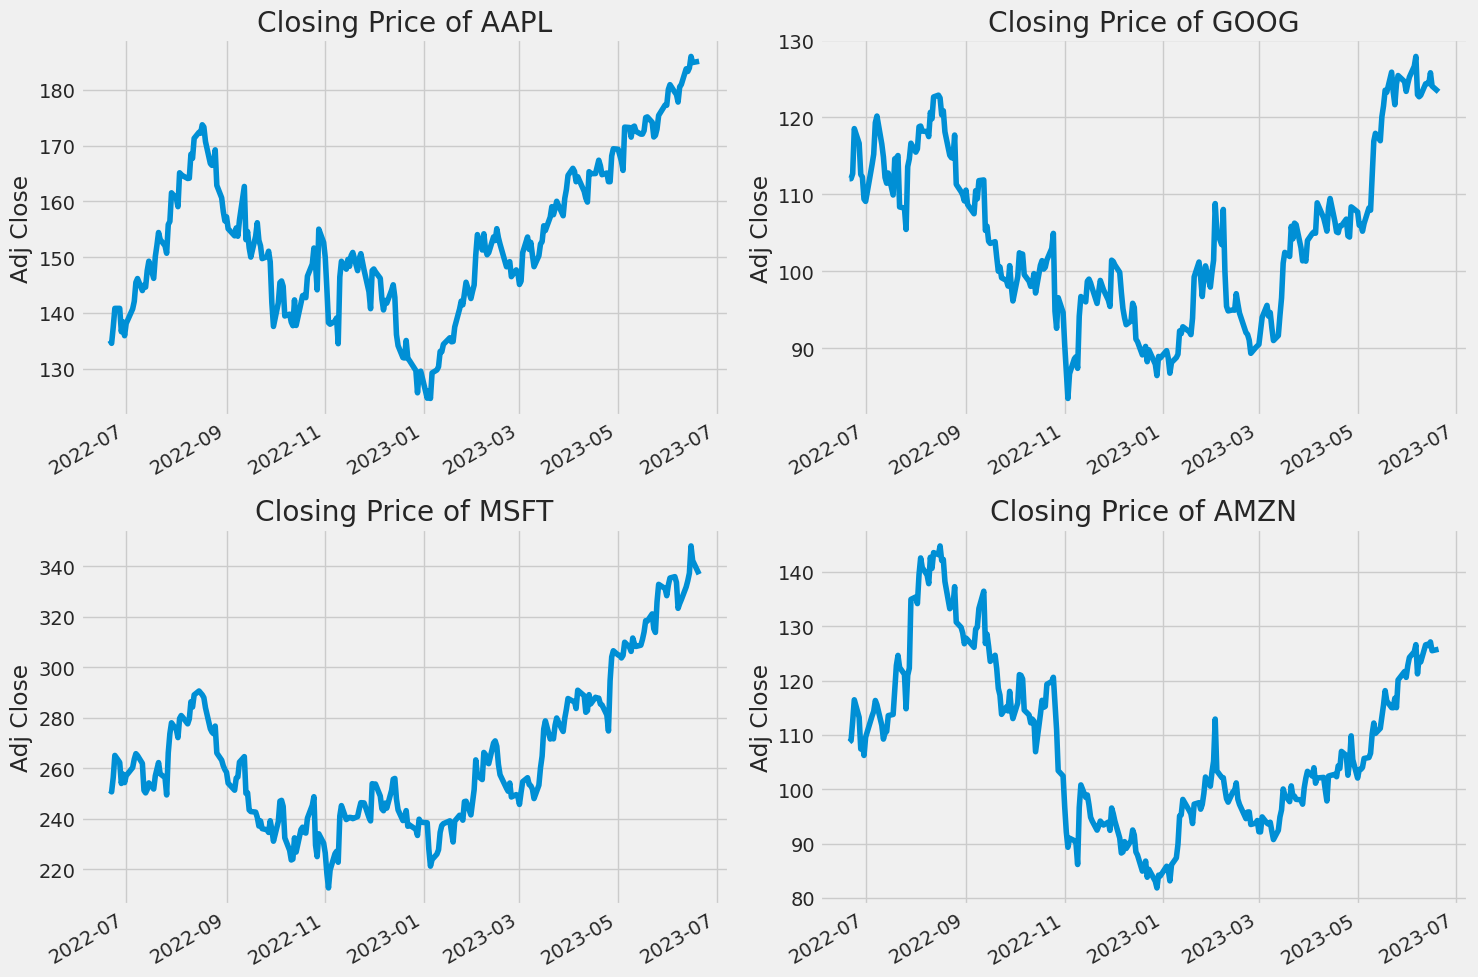

In [4]:
#historical view of closing price

plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

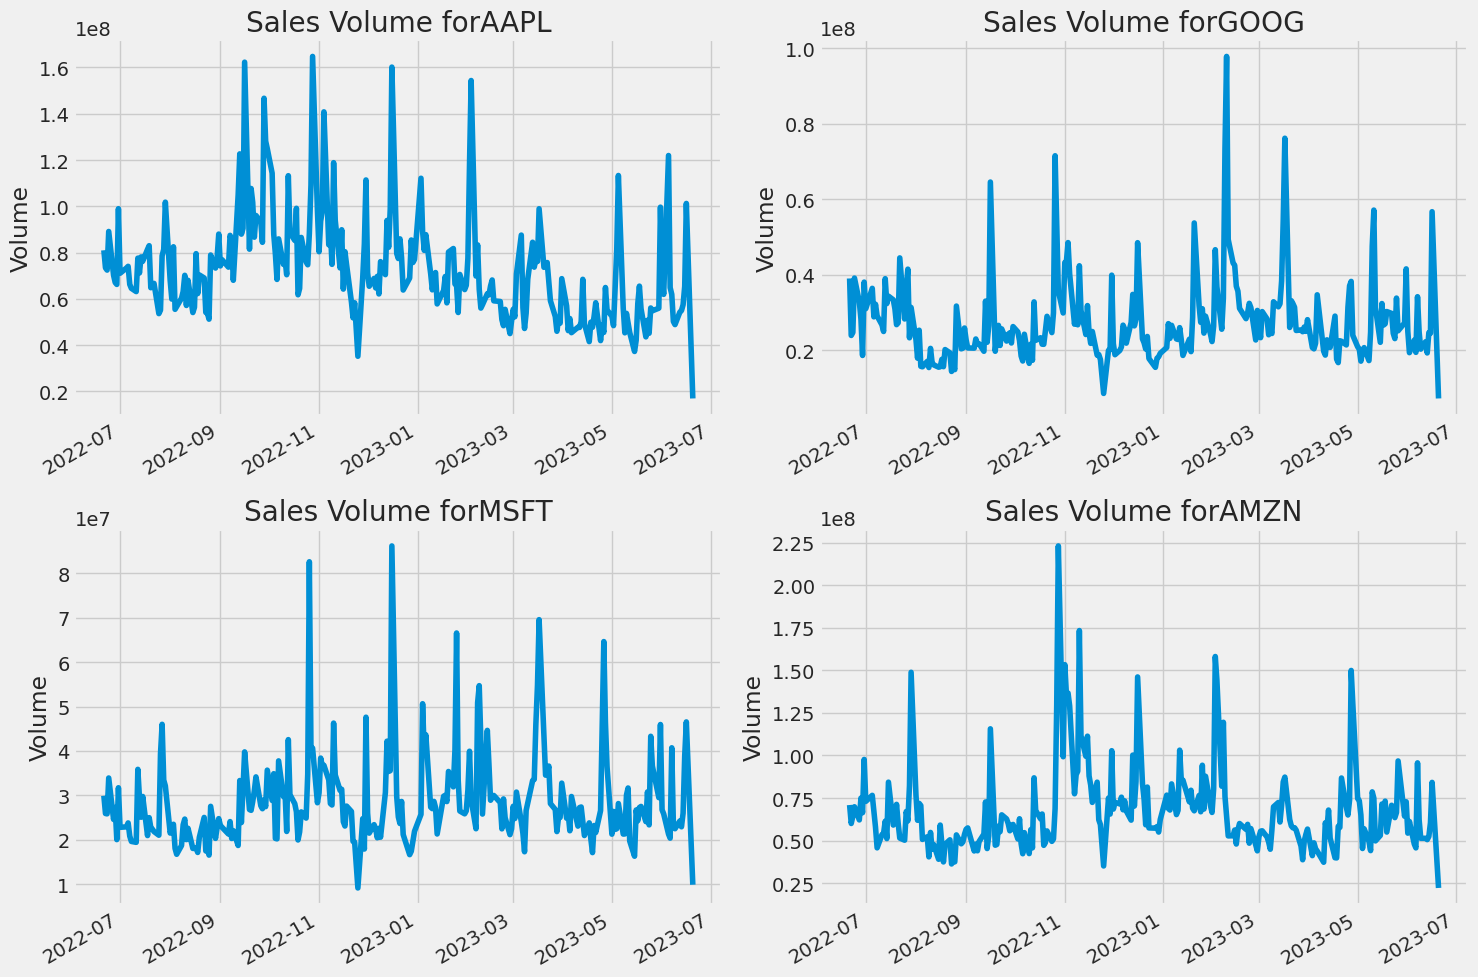

In [5]:
#plotting the total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)
for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for{tech_list[i - 1]}")
plt.tight_layout()

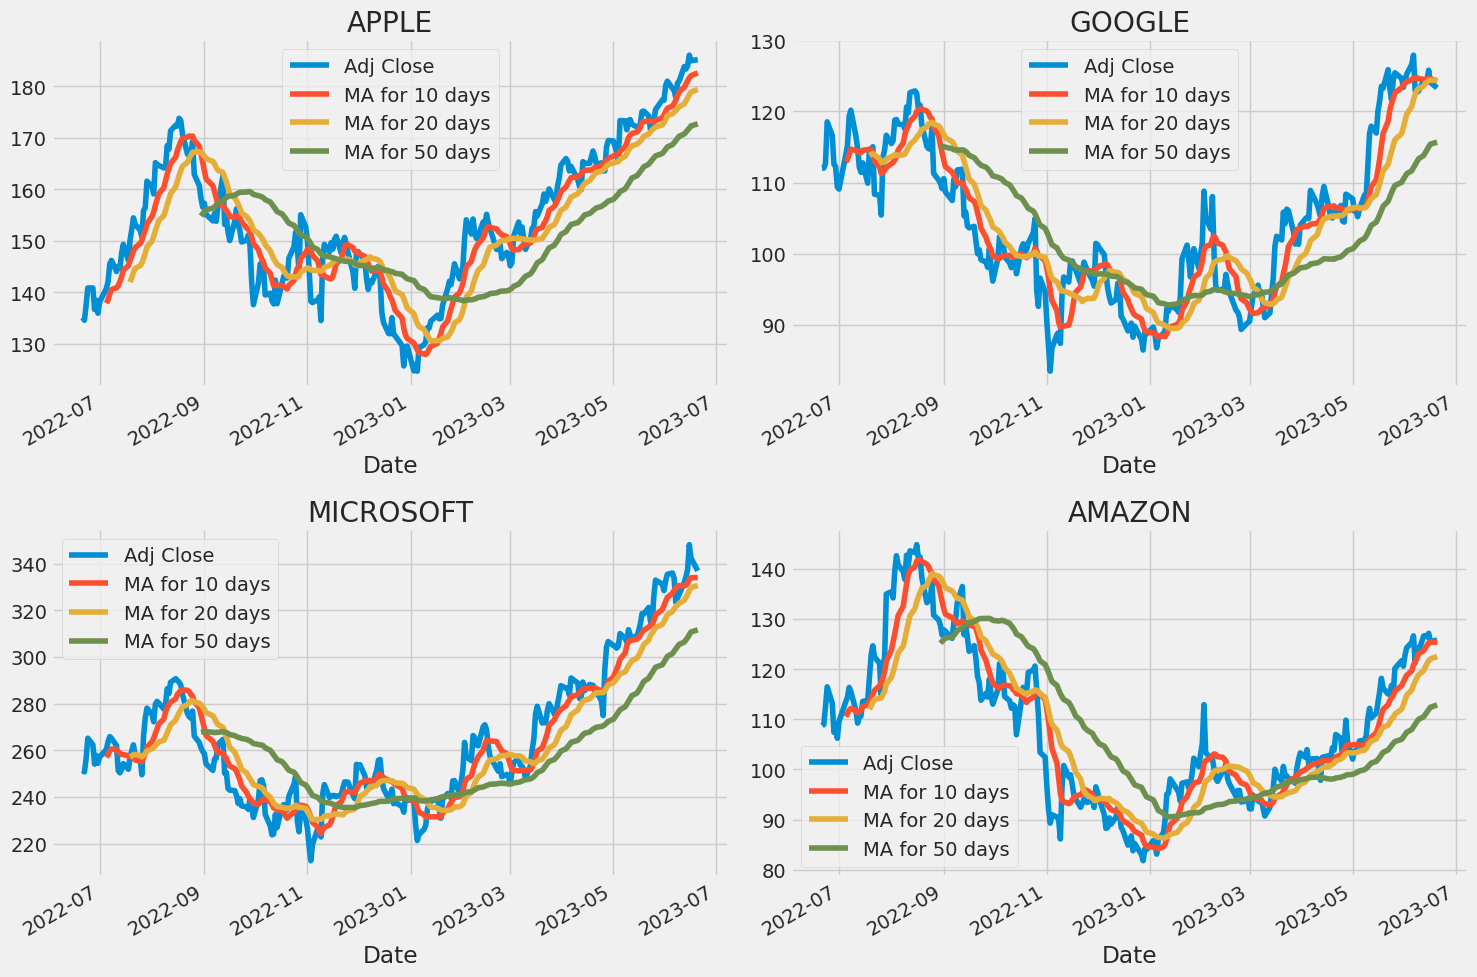

In [6]:
#Moving Average of various Stocks

Ma_day =[10,20,50]
for Ma in Ma_day:
  for company in company_list:
    col_name = f"MA for {Ma} days"
    company[col_name] = company['Adj Close'].rolling(Ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

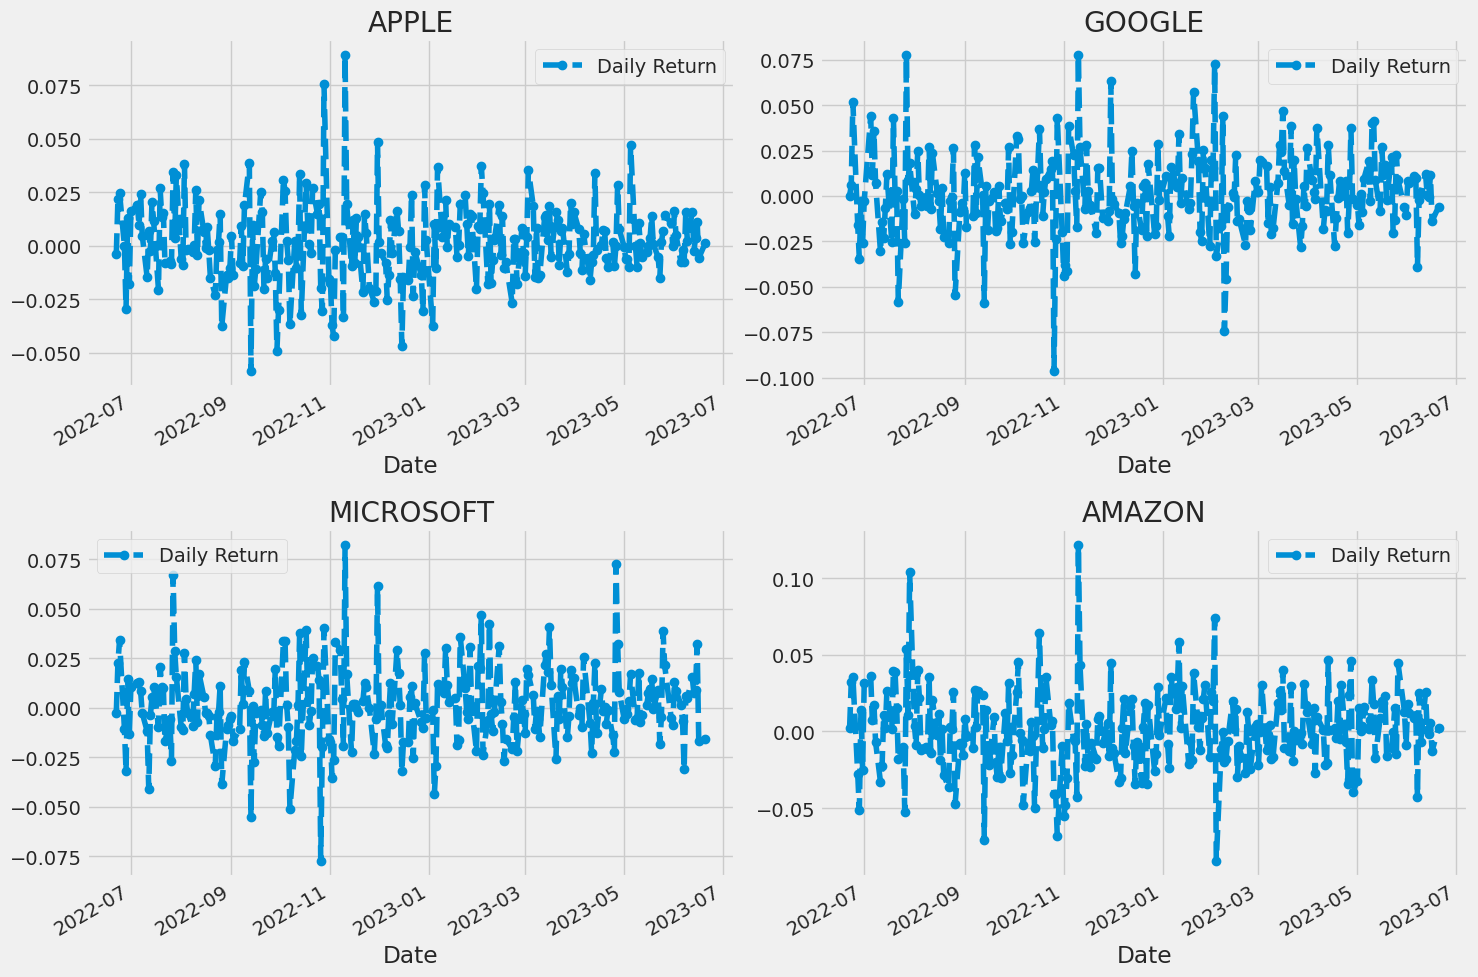

In [7]:
# daily return of stock on average

for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows = 2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

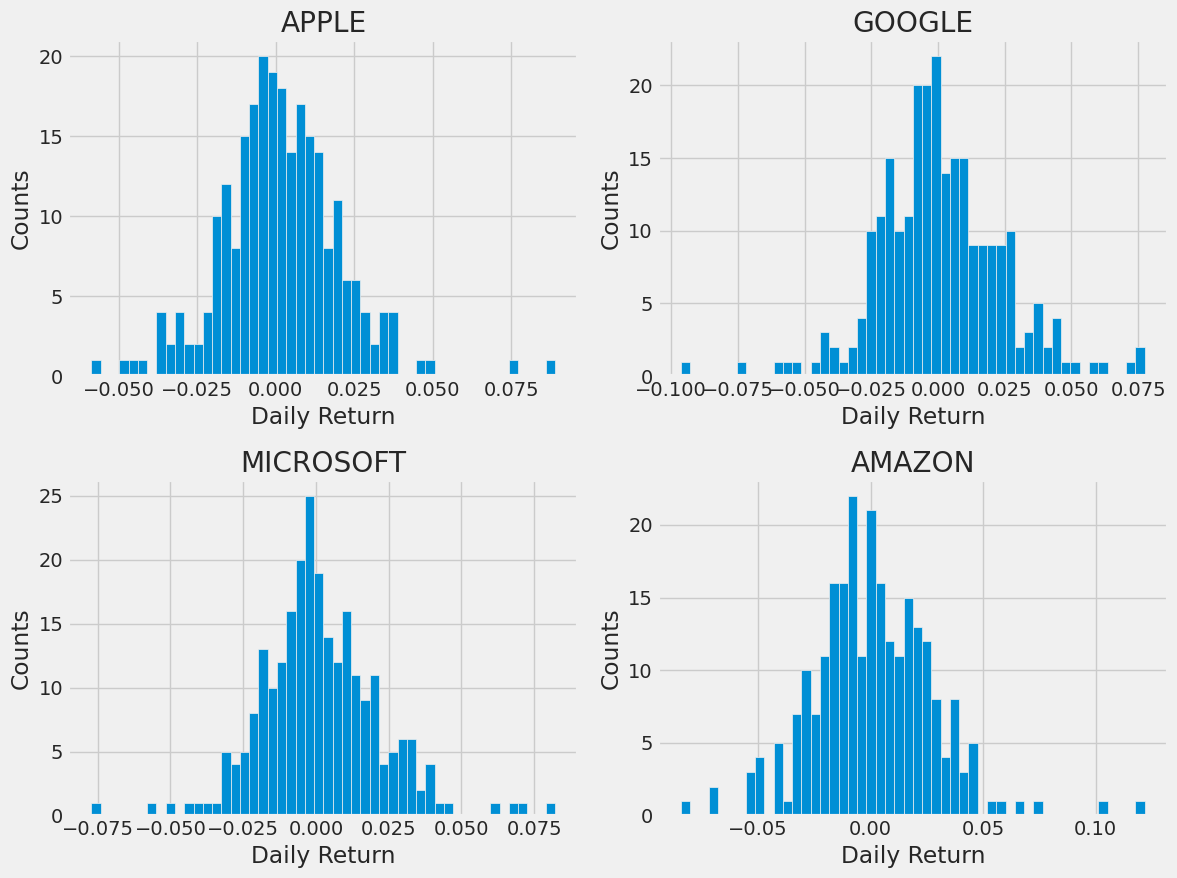

In [8]:
#using Histogram

plt.figure(figsize=(12,9))
for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [9]:
#Correlation between different stock closing prices

close_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_return = close_df.pct_change()
tech_return.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-21,NaN,NaN,NaN,NaN
2022-06-22,-0.003827,0.002484,0.000170,-0.002404
2022-06-23,0.021574,0.032033,0.005806,0.022637
2022-06-24,0.024517,0.035752,0.051946,0.034150
2022-06-27,0.000000,-0.027821,-0.016159,-0.010497


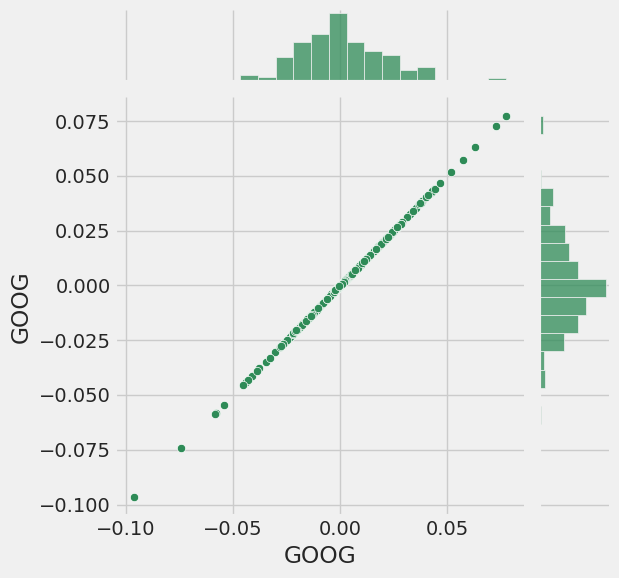

In [10]:
#compare google stock to self to view perfect linear relation

sns.jointplot(x='GOOG', y='GOOG', data=tech_return, kind='scatter', color='seagreen')

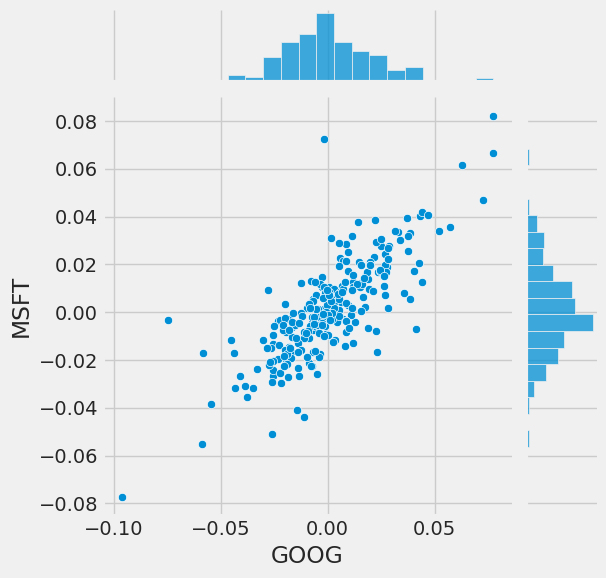

In [11]:
#comparing daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT',data=tech_return, kind='scatter')

In [12]:
#positively correlated

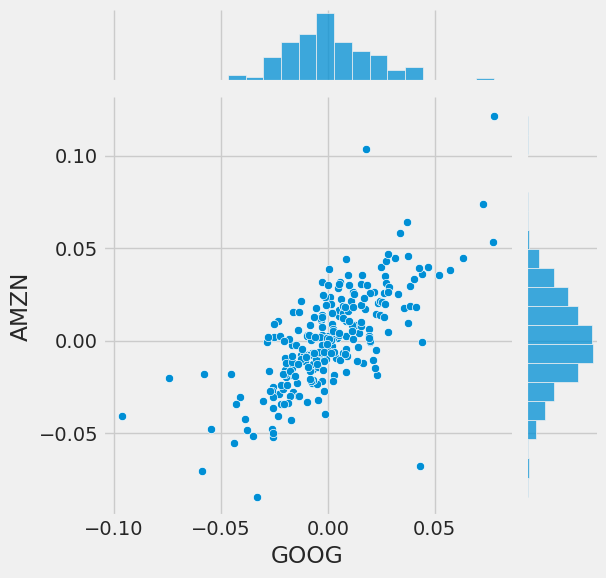

In [13]:
#compare daily returns of Google and Amazon
sns.jointplot(x='GOOG',y='AMZN',data=tech_return, kind='scatter')


In [ ]:
#positive coorelation with outliers

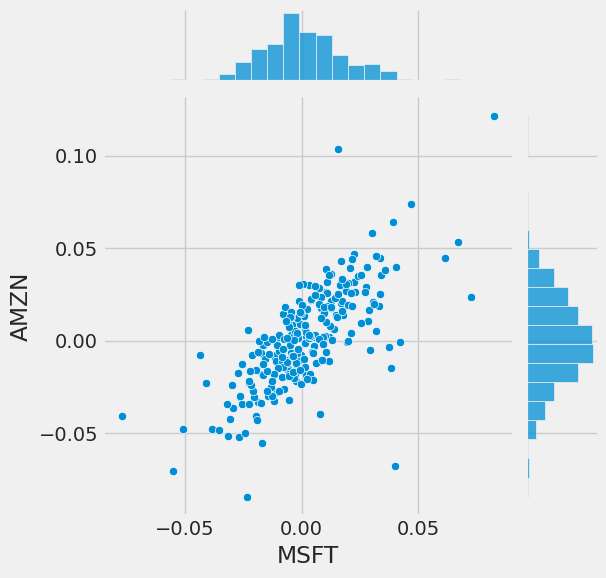

In [14]:
#compare daily returns of Microsoft and Amazon
sns.jointplot(x='MSFT',y='AMZN',data=tech_return, kind='scatter')

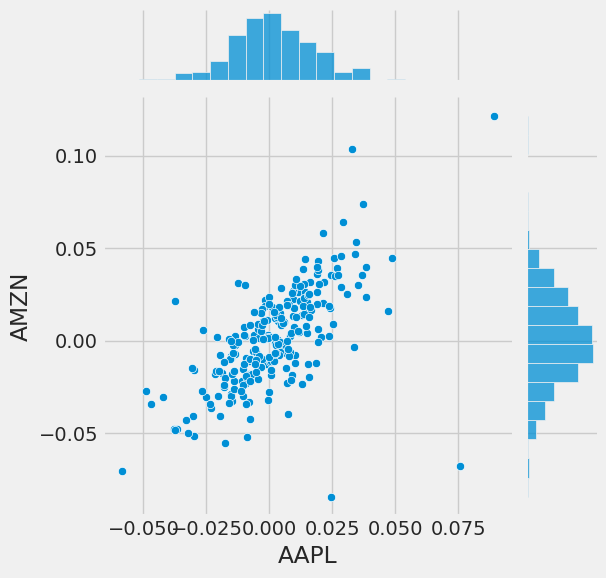

In [15]:
#compare daily returns of Apple and Amazon
sns.jointplot(x='AAPL',y='AMZN',data=tech_return, kind='scatter')

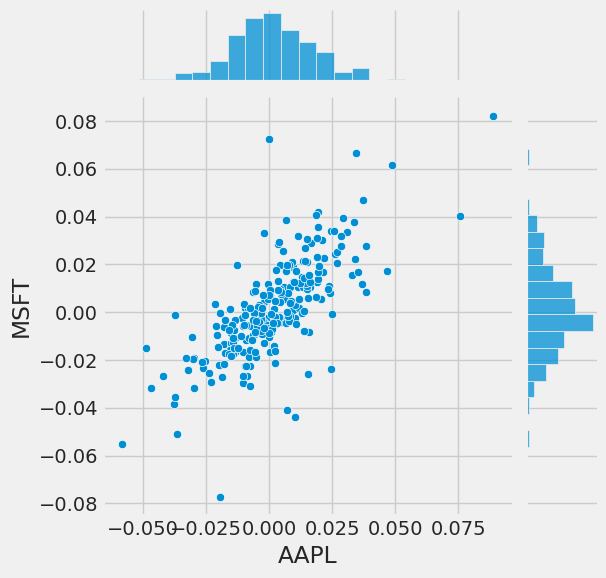

In [16]:
#compare daily returns of Apple and Microsoft
sns.jointplot(x='AAPL',y='MSFT',data=tech_return, kind='scatter')

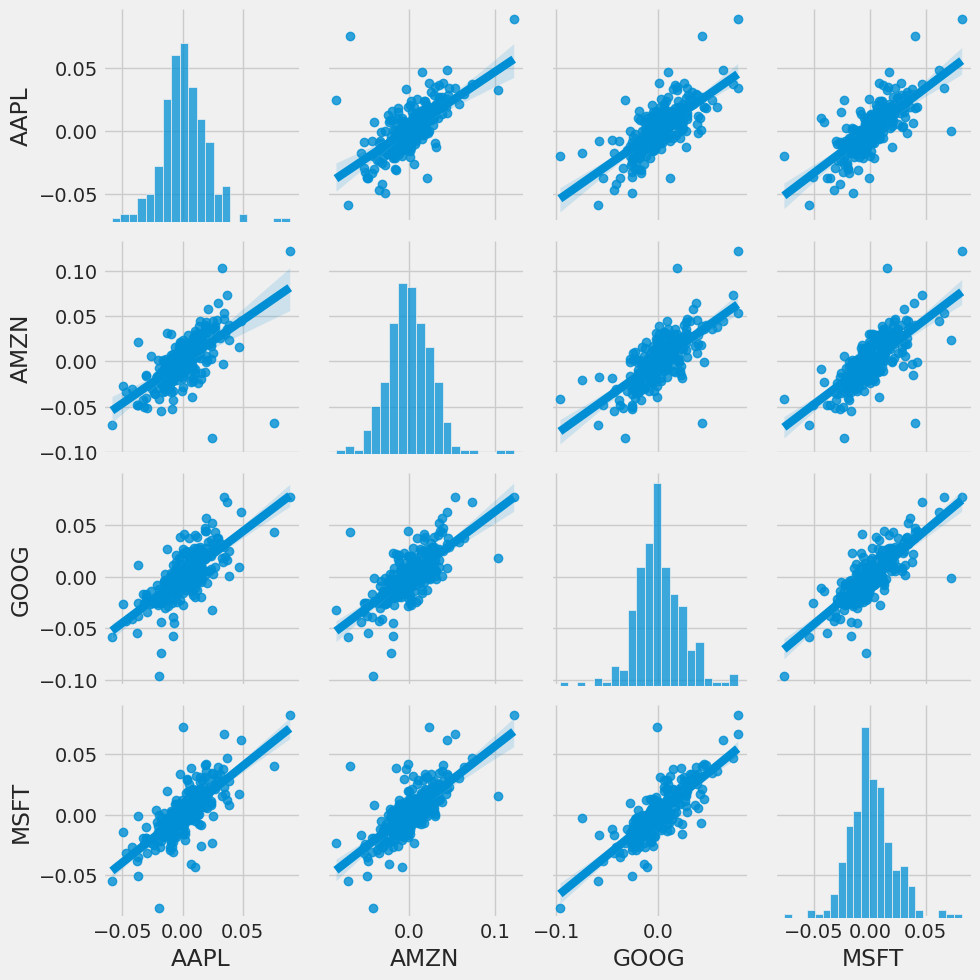

In [17]:
#pairplot of all comparisons

sns.pairplot(tech_return, kind='reg')

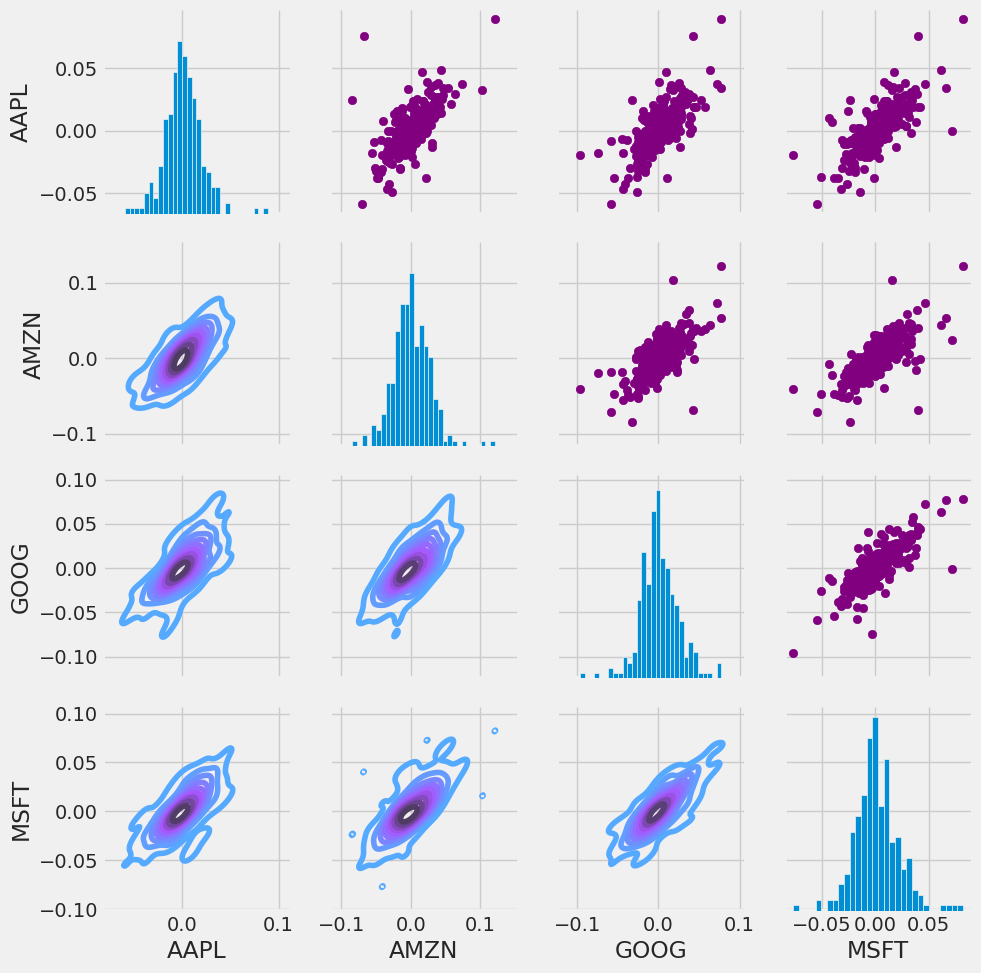

In [18]:
#plotting a full controlled visualization using PairGrid of seaborn

returns_figure = sns.PairGrid(tech_return.dropna())
returns_figure.map_upper(plt.scatter, color='purple')
returns_figure.map_lower(sns.kdeplot, cmap='cool_d')
returns_figure.map_diag(plt.hist, bins=30)

In [ ]:
#for closing price

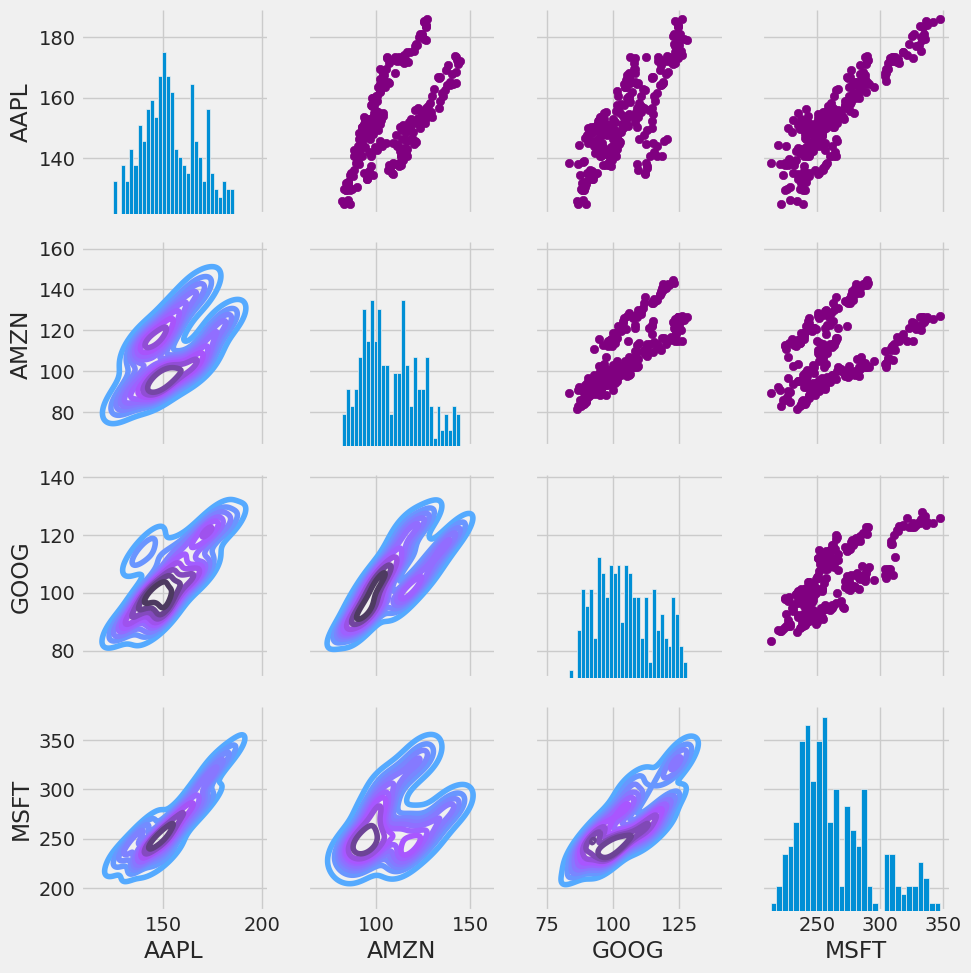

In [19]:
return_figure = sns.PairGrid(close_df)
return_figure.map_upper(plt.scatter,color='purple')
return_figure.map_lower(sns.kdeplot,cmap='cool_d')
return_figure.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation Plot of Stock Closing Prices')

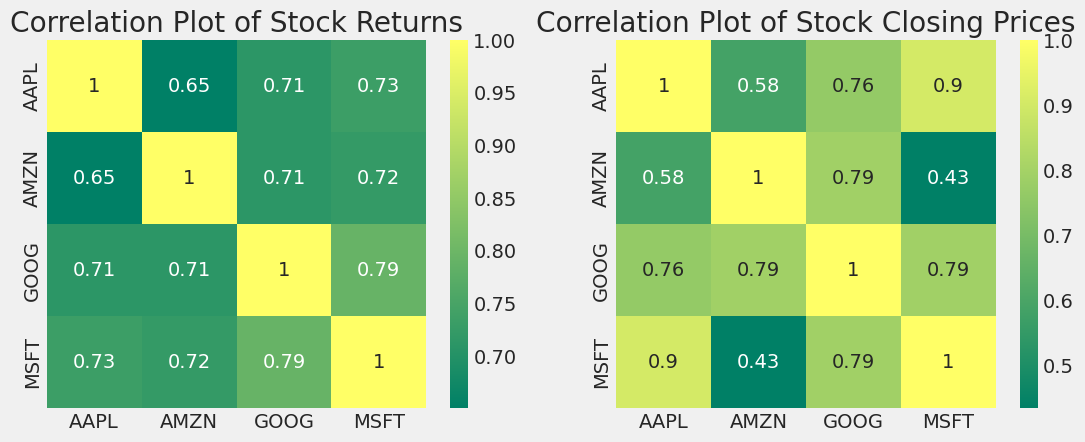

In [20]:
#correlation plot for stock closing price

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_return.corr(), annot=True, cmap='summer')
plt.title('Correlation Plot of Stock Returns')
plt.subplot(2,2,2)
sns.heatmap(close_df.corr(), annot=True,cmap='summer')
plt.title('Correlation Plot of Stock Closing Prices')

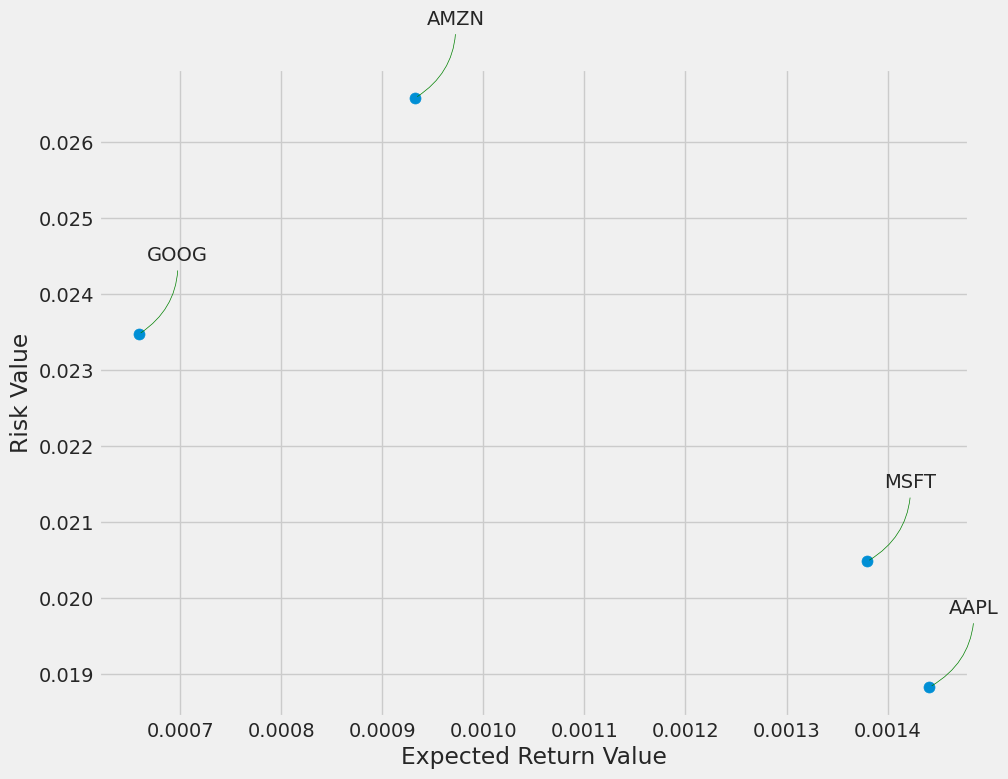

In [21]:
from matplotlib.patches import ConnectionStyle
#value risked by investing in any stock

returns = tech_return.dropna()
area = np.pi * 20
plt.figure(figsize=(10,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected Return Value')
plt.ylabel('Risk Value')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
  plt.annotate(label, xy=(x,y), xytext=(50,50),textcoords='offset points', ha='right', va='bottom',
               arrowprops = dict(arrowstyle = '-', color = 'green', connectionstyle = 'arc3,rad = -0.3'))


In [22]:
#predicting the close price of Apple Inc

df=pdr.get_data_yahoo('AAPL',start='2012-01-01',end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801654,394024400
...,...,...,...,...,...,...
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900
2023-06-15,183.960007,186.520004,183.779999,186.009995,186.009995,65433200


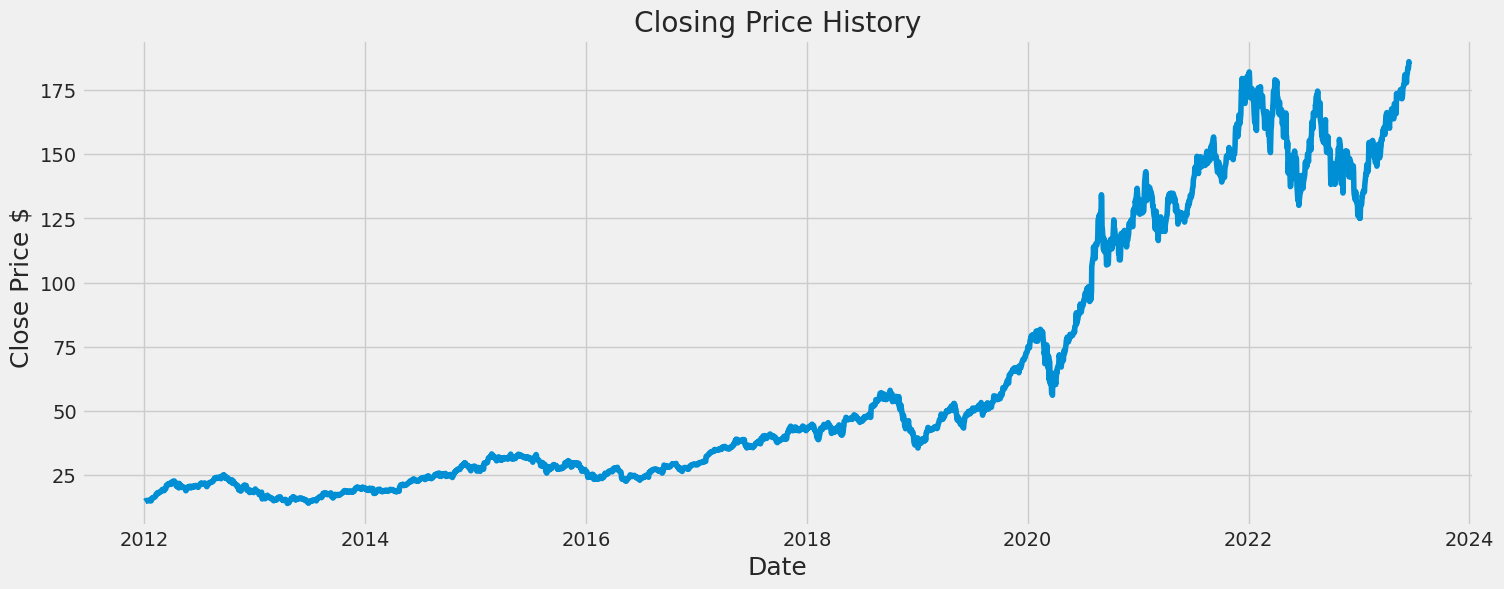

In [23]:
plt.figure(figsize=(16,6))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $ ',fontsize=18)
plt.show()

In [24]:
#creating a new data-frame with close column

data = df.filter(['Close'])
dataset = data.values
train_data_length = int(np.ceil(len(dataset)*.95))
train_data_length

2740

In [26]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00429661],
       [0.00475533],
       [0.00570806],
       ...,
       [1.        ],
       [0.99366511],
       [0.99410098]])

In [27]:
#training data-set

train_data = scaled_data[0:int(train_data_length), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00429661, 0.00475533, 0.00570806, 0.00661512, 0.00647605,
       0.00678947, 0.00664625, 0.00640548, 0.00607752, 0.00709252,
       0.00800789, 0.0077256 , 0.00617923, 0.00765502, 0.00620206,
       0.01165067, 0.01122931, 0.01177936, 0.01296871, 0.01368896,
       0.01362877, 0.01340667, 0.01435317, 0.01524363, 0.0162524 ,
       0.01788179, 0.02130455, 0.02135644, 0.0232619 , 0.0246858 ,
       0.0222386 , 0.02318094, 0.02316227, 0.02580458, 0.02542888,
       0.02612422, 0.02737377, 0.02806912, 0.03007213, 0.03153131,
       0.03195267, 0.03210005, 0.02960511, 0.02900316, 0.02909242,
       0.03143792, 0.03209798, 0.03351565, 0.03685745, 0.04131597,
       0.04048155, 0.04048363, 0.04370713, 0.0447159 , 0.04399771,
       0.04334181, 0.04265892, 0.04492761, 0.04648436, 0.04713611])]
[0.04552539958823548]

[array([0.00429661, 0.00475533, 0.00570806, 0.00661512, 0.00647605,
       0.00678947, 0.00664625, 0.00640548, 0.00607752, 0.00709252,
       0.00800789, 0.0077256 , 0.00

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer ='adam', loss ='mean_squared_error')
model.fit(x_train,y_train,batch_size=1, epochs=1)

2680/2680 [==============================] - 108s 39ms/step - loss: 0.0013


In [30]:
#test set

test_data = scaled_data[train_data_length-60:,:]
x_test = []
y_test =dataset[train_data_length:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)
rmse=np.sqrt(np.mean(((prediction-y_test)**2)))
rmse

5/5 [==============================] - 1s 33ms/step


3.4721376016199383

<ipython-input-32-b280f2f72d02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


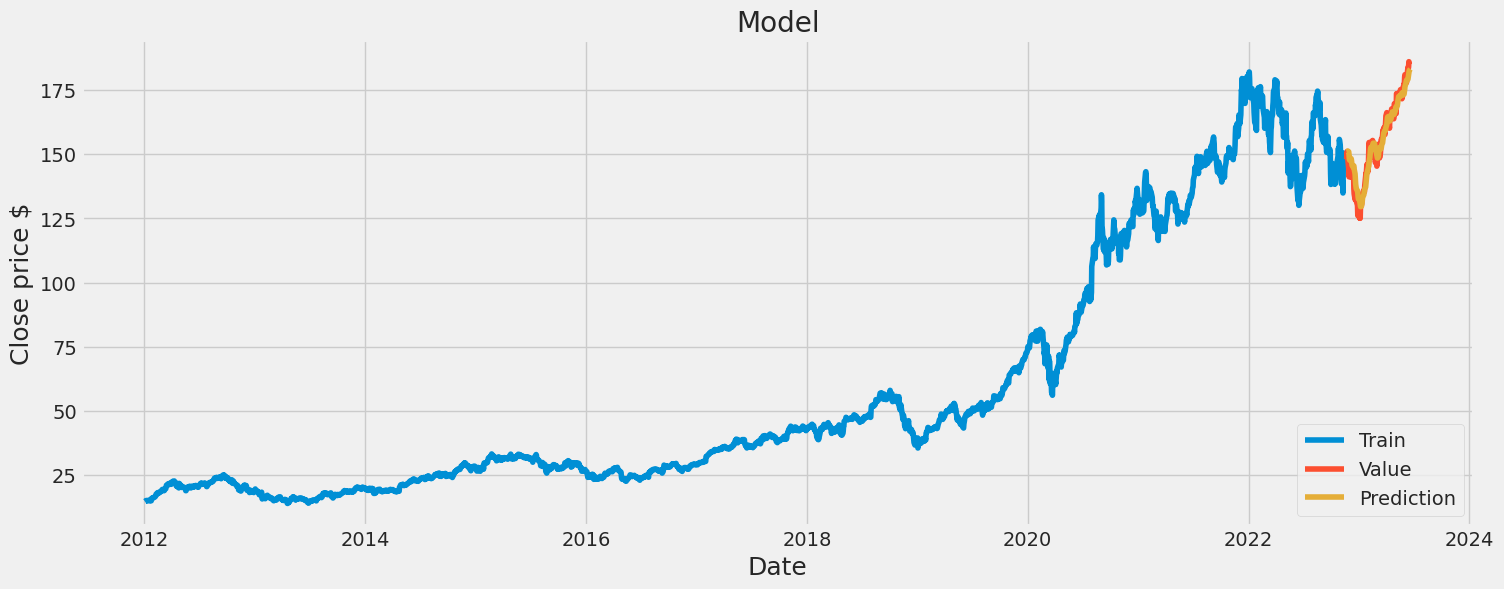

In [32]:
#plotting data

train = data[:train_data_length]
valid = data[train_data_length:]
valid['prediction'] = prediction
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'prediction']])
plt.legend(['Train','Value','Prediction'],loc='lower right')
plt.show()

In [33]:
valid

,Close,prediction
Date,,
2022-11-21,148.009995,150.821243
2022-11-22,150.179993,150.859039
2022-11-23,151.070007,150.964142
2022-11-25,148.110001,151.208984
2022-11-28,144.220001,150.927017
...,...,...
2023-06-13,183.309998,180.064194
2023-06-14,183.949997,180.847855
2023-06-15,186.009995,181.581268
